<a href="https://colab.research.google.com/github/tammyray997/NGG6050/blob/main/binomial-distribution-exersizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
This is formatted as code
```

# Fri Sep 4th Pre-class tutorial

#Exercise 1: If someone gets a positive test, is it "statistically significant" at the p<0.05 level? Why or why not?

In [ ]:
#Exercise 1: If someone gets a positive test, is it "statistically significant" at the p<0.05 level? Why or why not?

In [ ]:
#Given values
population = 1000
num_infected = 400
false_pos_rate = 0.05
false_neg_rate = 0

#calculating number of times that you test positive for the disease and have the disease
true_pos = (population * (num_infected/population))
#true_pos
#calculating number of times that you test positive for the disease and do NOT have the disease
false_pos = (population * ((population-num_infected)/population) * false_pos_rate)
#false_pos

p_true_pos = num_infected/(true_pos+false_pos)

print(p_true_pos)


0.9302325581395349


It is not statistically significant at the P<0.05 level. We are 93% confident that a positive test result is indicative of having the disease. So, inversely the probability of someone getting a positive test result and not being positive in reality is are 7% (0.07). The confidence must be higher, at least 95%, for the test to be statistically significant at p<0.05

#Exercise #2: What is the probability that if someone gets a positive test, that person is infected?

In [ ]:
#Given values
population = 1000
num_infected = 20
false_pos_rate = 0.05
false_neg_rate = 0

#calculating number of times that you test positive for the disease and have the disease
true_pos = (population * (num_infected/population))
#true_pos
#calculating number of times that you test positive for the disease and do NOT have the disease
false_pos = (population * ((population-num_infected)/population) * false_pos_rate)
#false_pos

p_true_pos = num_infected/(true_pos+false_pos)

print(p_true_pos)

0.2898550724637681


#Fri Sep 6th Pre-class tutorial

In [ ]:
#1. Bernoulli distribution

import random as rnd
from scipy.stats import bernoulli


# In Python we can use random, which produces a random variable on the interval
#   [0,1), which means that all values are greater than or equal to 0 and less
#   than 1. This function is park of the "random" package imported above as "rnd".
p = 0.7 # choose value for p
single_outcome_method_1 = rnd.random() < p # create logical variable from single pick
print(f"outcome using rand = {single_outcome_method_1}") # print the result

# Or, equivalently, use bernoulli, which is a function in scipy.stats that
#   generates a random pick from a Bernoulli distribution.
# Choose value for p
p = 0.7
# Generate a single sample using the rvs ("random variates") method.
#   To generate >1 sample, use the size argument
single_outcome_method_2 = bernoulli.rvs(p, size=1)
# Print the output
print(f'outcome using binornd = {bool(single_outcome_method_2)}')

# Now generate lots of Bernoulli trials to check if it is converging on the
#   appropriate probability
# Choose value for p
p = 0.7
# Number of Bernoulli trials to simulate
N = 10000
# Use the size argument to generate outcomes (an ndarray) from lot of trials
outcomes = bernoulli.rvs(p, size=N)
type(outcomes)
print(f'{(outcomes == False).sum()} zeros, {(outcomes == True).sum()} ones, simulated p = {(outcomes == True).sum()/outcomes.size}, empirical p = {p}')

outcome using rand = True
outcome using binornd = False
2981 zeros, 7019 ones, simulated p = 0.7019, empirical p = 0.7


2. Binomial

694 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6940


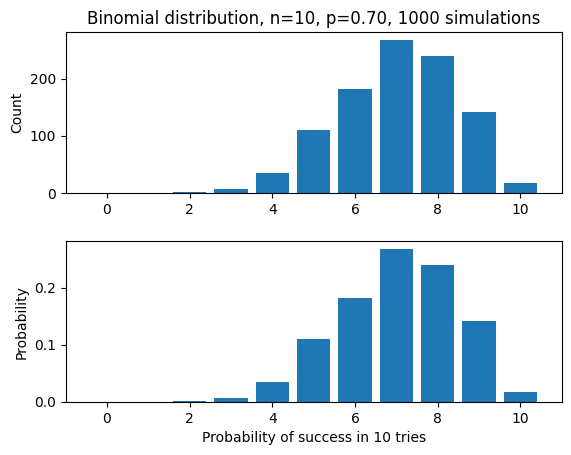

In [ ]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib


# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')
#697 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6970


# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, the the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

# Now let's make a fun animation showing different values of p and N.
#   Note that, of course, the more picks you make of the random variable
#   (higher N), the more closely the outcomes (the "samples") match the true
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)

        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



# The cumulative distribution function is just the proability of obtaining an
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so
#   it is a probability function and not just a histogram -- note that the final
#   value in the cdf should equal 1 because every value should be equal to or
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))


Exercise 1.
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [7]:
import random as rnd
import scipy.stats as st
from scipy.stats import bernoulli
import numpy as np

p = 0.2 #probability of quanta release
n = 10 #number of trials/number of potential quanta able to be released
N = 1 #because it is one experiment
k_values = np.arange(0, n+1)
probabilities = st.binom.pmf(k_values, n, p)

for k, prob in zip(k_values, probabilities):
    print(f"Probability of releasing {k} quanta: {prob:.4f}")

Probability of releasing 0 quanta: 0.1074
Probability of releasing 1 quanta: 0.2684
Probability of releasing 2 quanta: 0.3020
Probability of releasing 3 quanta: 0.2013
Probability of releasing 4 quanta: 0.0881
Probability of releasing 5 quanta: 0.0264
Probability of releasing 6 quanta: 0.0055
Probability of releasing 7 quanta: 0.0008
Probability of releasing 8 quanta: 0.0001
Probability of releasing 9 quanta: 0.0000
Probability of releasing 10 quanta: 0.0000


#Exersize 2

Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.

Likelihood for p=0.1: 0.000016
Likelihood for p=0.7: 0.126202

Maximum likelihood: 0.206598 at p=0.6


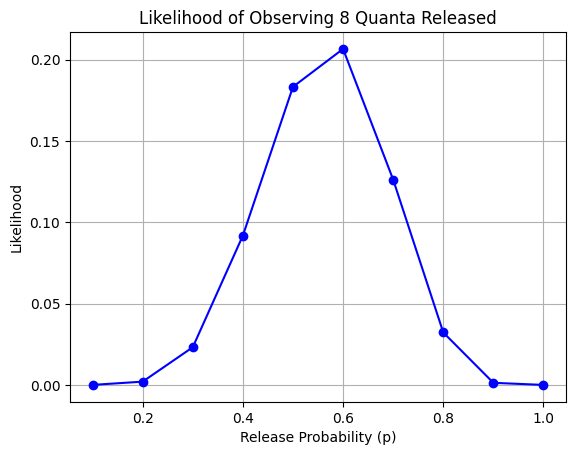

In [8]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Parameters
n_quanta = 14       # total number of quanta
observed_quanta = 8 # number of quanta released in the experiment

# List of probabilities to test
p_values = np.linspace(0.1, 1.0, 10)  # from 0.1 to 1.0 in steps of 0.1

# Compute the binomial likelihood for each p value
likelihoods = st.binom.pmf(observed_quanta, n_quanta, p_values)

# Print the likelihoods for p = 0.1 and p = 0.7 specifically
p_01 = 0.1
p_07 = 0.7
likelihood_01 = st.binom.pmf(observed_quanta, n_quanta, p_01)
likelihood_07 = st.binom.pmf(observed_quanta, n_quanta, p_07)

print(f"Likelihood for p=0.1: {likelihood_01:.6f}")
print(f"Likelihood for p=0.7: {likelihood_07:.6f}")

# Find the maximum likelihood and corresponding p value
max_likelihood_idx = np.argmax(likelihoods)
max_likelihood_p = p_values[max_likelihood_idx]
max_likelihood = likelihoods[max_likelihood_idx]

print(f"\nMaximum likelihood: {max_likelihood:.6f} at p={max_likelihood_p:.1f}")

# Plot the likelihood function
plt.plot(p_values, likelihoods, marker='o', color='b')
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood of Observing 8 Quanta Released')
plt.grid(True)
plt.show()


#Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

<ipython-input-9-5288e9afcf26>:21: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum([np.log(st.binom.pmf(k, n_quanta, p)) for k in observed_measurements])


Total Likelihood for p=0.1: 0.000000
Total Log-Likelihood for p=0.1: -15.904745

Maximum Likelihood: 0.022396 at p=0.5
Maximum Log-Likelihood: -3.798852 at p=0.5


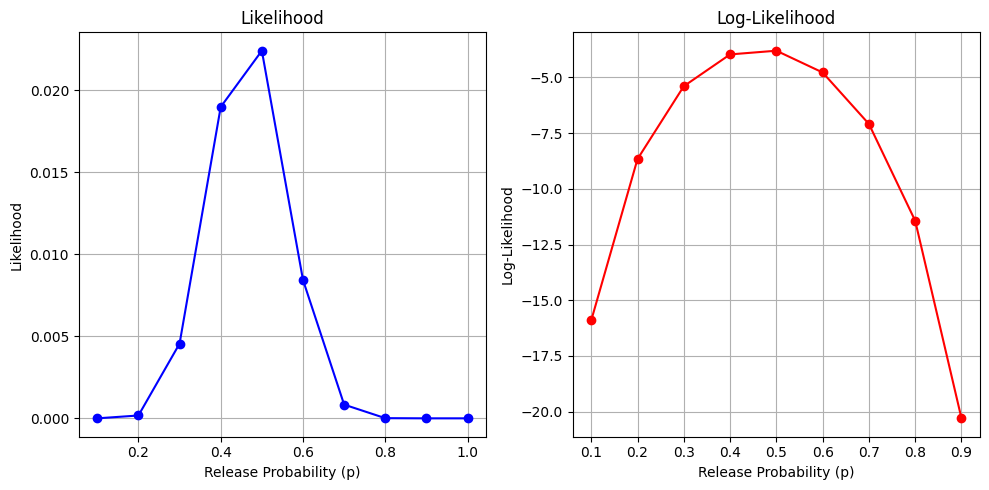


Finer resolution - Maximum Likelihood: 0.024056 at p=0.464
Finer resolution - Maximum Log-Likelihood: -3.727372 at p=0.464


<ipython-input-9-5288e9afcf26>:78: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum([np.log(st.binom.pmf(k, n_quanta, p)) for k in observed_measurements])


In [9]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Parameters
n_quanta = 14          # total number of quanta
observed_measurements = [8, 5]  # two independent measurements

# List of probabilities to test: from 0.1 to 1.0 in steps of 0.1
p_values = np.linspace(0.1, 1.0, 10)

# Likelihood and log-likelihood for each p value
likelihoods = []
log_likelihoods = []

for p in p_values:
    # Compute the likelihood for each measurement independently and take the product
    likelihood = np.prod([st.binom.pmf(k, n_quanta, p) for k in observed_measurements])

    # Compute the log-likelihood as the sum of the log of the individual likelihoods
    log_likelihood = np.sum([np.log(st.binom.pmf(k, n_quanta, p)) for k in observed_measurements])

    # Store the results
    likelihoods.append(likelihood)
    log_likelihoods.append(log_likelihood)

# Convert lists to arrays for easier manipulation
likelihoods = np.array(likelihoods)
log_likelihoods = np.array(log_likelihoods)

# Compute the likelihood and log-likelihood for p=0.1 specifically
p_01_likelihood = np.prod([st.binom.pmf(k, n_quanta, 0.1) for k in observed_measurements])
p_01_log_likelihood = np.sum([np.log(st.binom.pmf(k, n_quanta, 0.1)) for k in observed_measurements])

print(f"Total Likelihood for p=0.1: {p_01_likelihood:.6f}")
print(f"Total Log-Likelihood for p=0.1: {p_01_log_likelihood:.6f}")

# Find the maximum likelihood and log-likelihood across the range of p values
max_likelihood_idx = np.argmax(likelihoods)
max_log_likelihood_idx = np.argmax(log_likelihoods)

max_likelihood_p = p_values[max_likelihood_idx]
max_log_likelihood_p = p_values[max_log_likelihood_idx]

print(f"\nMaximum Likelihood: {likelihoods[max_likelihood_idx]:.6f} at p={max_likelihood_p:.1f}")
print(f"Maximum Log-Likelihood: {log_likelihoods[max_log_likelihood_idx]:.6f} at p={max_log_likelihood_p:.1f}")

# Plot the likelihood and log-likelihood functions
plt.figure(figsize=(10, 5))

# Plot Likelihood
plt.subplot(1, 2, 1)
plt.plot(p_values, likelihoods, marker='o', color='b')
plt.title('Likelihood')
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.grid(True)

# Plot Log-Likelihood
plt.subplot(1, 2, 2)
plt.plot(p_values, log_likelihoods, marker='o', color='r')
plt.title('Log-Likelihood')
plt.xlabel('Release Probability (p)')
plt.ylabel('Log-Likelihood')
plt.grid(True)

plt.tight_layout()
plt.show()

# Improve resolution by increasing the number of p values
p_values_fine = np.linspace(0.01, 1.0, 1000)  # Higher resolution from 0.01 to 1.0
fine_likelihoods = []
fine_log_likelihoods = []

for p in p_values_fine:
    # Compute the likelihood and log-likelihood for each p value
    likelihood = np.prod([st.binom.pmf(k, n_quanta, p) for k in observed_measurements])
    log_likelihood = np.sum([np.log(st.binom.pmf(k, n_quanta, p)) for k in observed_measurements])

    fine_likelihoods.append(likelihood)
    fine_log_likelihoods.append(log_likelihood)

# Convert fine likelihoods to arrays
fine_likelihoods = np.array(fine_likelihoods)
fine_log_likelihoods = np.array(fine_log_likelihoods)

# Find the maximum likelihood and log-likelihood at finer resolution
max_fine_likelihood_idx = np.argmax(fine_likelihoods)
max_fine_log_likelihood_idx = np.argmax(fine_log_likelihoods)

max_fine_likelihood_p = p_values_fine[max_fine_likelihood_idx]
max_fine_log_likelihood_p = p_values_fine[max_fine_log_likelihood_idx]

print(f"\nFiner resolution - Maximum Likelihood: {fine_likelihoods[max_fine_likelihood_idx]:.6f} at p={max_fine_likelihood_p:.3f}")
print(f"Finer resolution - Maximum Log-Likelihood: {fine_log_likelihoods[max_fine_log_likelihood_idx]:.6f} at p={max_fine_log_likelihood_p:.3f}")


#Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

What is the most likely value of p (which we typically refer to as
, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find
.

Maximum Likelihood Estimate (p^): 0.440
Maximum Likelihood: 0.000000


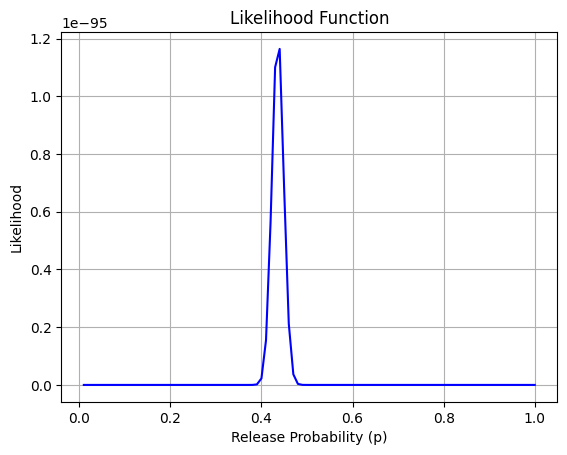

In [10]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Data from the experiment
release_counts = np.array([0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0])  # Number of times each release count was observed
total_experiments = 100  # Total number of experiments
n_quanta = 14  # Total number of quanta available for release

# List of probabilities (p) to test from 0.01 to 1.0 in steps of 0.01
p_values = np.linspace(0.01, 1.0, 100)

# Likelihood array to store the likelihood for each p
likelihoods = []

# Compute likelihood for each p value
for p in p_values:
    # Compute the likelihood for the entire set of data (multinomial form)
    likelihood = np.prod([st.binom.pmf(k, n_quanta, p)**count for k, count in enumerate(release_counts) if count > 0])
    likelihoods.append(likelihood)

# Convert likelihoods to array for easier manipulation
likelihoods = np.array(likelihoods)

# Find the p value that maximizes the likelihood (MLE)
max_likelihood_idx = np.argmax(likelihoods)
p_hat = p_values[max_likelihood_idx]
max_likelihood = likelihoods[max_likelihood_idx]

print(f"Maximum Likelihood Estimate (p^): {p_hat:.3f}")
print(f"Maximum Likelihood: {max_likelihood:.6f}")

# Plot the likelihood function
plt.plot(p_values, likelihoods, color='blue')
plt.title('Likelihood Function')
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.grid(True)
plt.show()


#Exercise 5

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute p^. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [12]:
import scipy.stats as st

# Parameters
n = 14          # Total number of quanta
p_null = 0.3    # Probability under the null hypothesis
k_observed = 7  # Number of quantal events observed

# Calculate the probability of getting k_observed or more successes
p_at_least_k = 1 - st.binom.cdf(k_observed - 1, n, p_null)

print(f"Probability of observing {k_observed} or more quantal events: {p_at_least_k:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p_at_least_k < alpha:
    print("The result is statistically significant. There is evidence to suggest that temperature has an effect.")
else:
    print("The result is not statistically significant. There is no strong evidence to suggest that temperature has an effect.")


Probability of observing 7 or more quantal events: 0.0933
The result is not statistically significant. There is no strong evidence to suggest that temperature has an effect.


#Gaussian/normal distribution

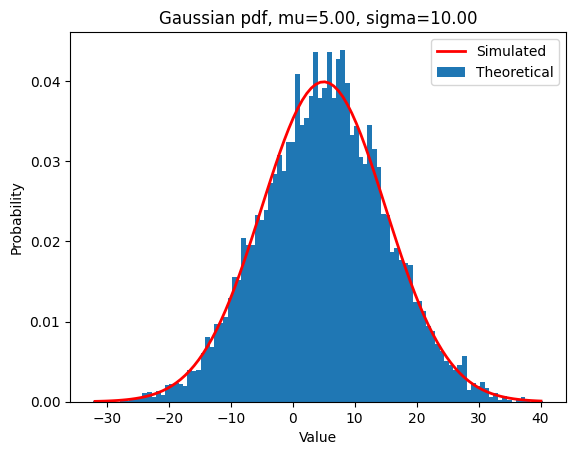

Sample mean = 5.157
Expected value of empirical distribution = 5.160
Expected value of the theoretical distribution = 4.995
Number of different values = 0


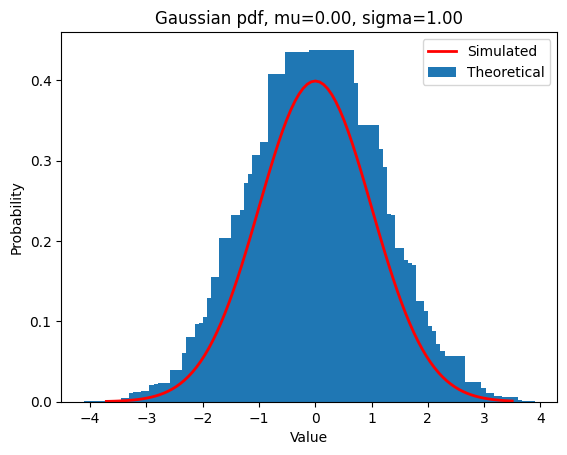

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Let's compare simulated and theoretical Gaussians
mu = 5
sigma = 10
N = 10000

# Get samples
samples = np.random.normal(mu, sigma, N)

# plot histogram for a given number of bins (using trapz to approximate pdf)
nbins = 100
counts, edges = np.histogram(samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
n_pdf = np.divide(counts, np.trapz(counts, xaxis))
plt.bar(xaxis, n_pdf)

# Show theoretical pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis, mu, sigma), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={mu:.2f}, sigma={sigma:.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()

# Some summary statistics
# 1. The sample mean
print(f'Sample mean = {np.mean(samples):.3f}')

# 2. The expected value of the empirical distribution: the sum of probability x value per bin. This should be similar to the sample mean, but recognize that we lost some information from the binning (i.e., use more bins and this should get closer to the sample mean)
print(f'Expected value of empirical distribution = {np.sum(np.prod([xaxis, np.diff(edges), n_pdf], axis=0)):.3f}')

# 3. The expected value of the theoretical distribution
print(f'Expected value of the theoretical distribution = {np.sum(np.prod([xaxis, np.diff(edges), st.norm.pdf(xaxis, mu, sigma)], axis=0)):.3f}')

# Now standardize ("z-score") the samples by subtracting the mean and dividing by the STD
# The harder way
zSamples = np.divide(samples-np.mean(samples), np.std(samples))

# The easier way
z2Samples = st.zscore(samples)

# Check that they are the same
print(f'Number of different values = {np.count_nonzero(zSamples-z2Samples)}')

# Show the distribution of z-scored values
counts, edges = np.histogram(z2Samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
plt.bar(xaxis, np.divide(counts, np.trapz(counts, xaxis)))

# Show theoretical "standard normal" pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={np.mean(zSamples):.2f}, sigma={np.std(zSamples):.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()


#9/9/24

Compute confidence/credible intervals based on the four methods above for simulated data sampled from a population that is Gaussian distributed with mean
=10 and standard deviation
=2, for n=5, 10, 20, 40, 80, 160, 1000 at a 95% confidence level.

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


# Simulate data and compute intervals for different sample sizes
n_values = [5, 10, 20, 40, 80, 160, 1000]
mean_population = 10
std_population = 2
confidence_level = 0.95


for n in n_values:
    # Generate samples from a normal distribution
    samples = np.random.normal(mean_population, std_population, size=n)
    mean = np.mean(samples)
    std_err = np.std(samples, ddof=1) / np.sqrt(n)  # Standard error of the mean

    # Z-interval (for large n, assuming known population variance)
    z_critical = st.norm.ppf((1 + confidence_level) / 2)
    z_interval = (mean - z_critical * std_err, mean + z_critical * std_err)

    # t-interval (for small n, using t-distribution)
    t_critical = st.t.ppf((1 + confidence_level) / 2, df=n-1)
    t_interval = (mean - t_critical * std_err, mean + t_critical * std_err)

    # Bootstrap interval (non-parametric)
    bootstrap_samples = np.random.choice(samples, size=(1000, n), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    bootstrap_interval = (lower_bound, upper_bound)

    # Bayesian credible interval (Normal-Inverse-Gamma prior)
    # For simplicity, assume a non-informative prior
    bayesian_interval = st.t.interval(confidence_level, df=n-1, loc=mean, scale=std_err)

    # Store intervals for each n
    interval_results[n] = {
        'z_interval': z_interval,
        't_interval': t_interval,
        'bootstrap_interval': bootstrap_interval,
        'bayesian_interval': bayesian_interval
    }

# Print the results
for n, intervals in interval_results.items():
    print(f"\nSample size: {n}")
    print(f"Z-interval: {intervals['z_interval']}")
    print(f"t-interval: {intervals['t_interval']}")
    print(f"Bootstrap interval: {intervals['bootstrap_interval']}")
    print(f"Bayesian interval: {intervals['bayesian_interval']}")